
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [13]:

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)


In [14]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        # adding a small epsilon to avoid division by zero
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1.0

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [15]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        # adding a small epsilon to avoid division by zero
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1.0

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            mse = np.mean((y_predicted - y) ** 2)
            l2_term = self.l2_lambda * np.sum(self.weights ** 2)
            loss = mse + l2_term
            self.loss_history.append(loss)

            dw = (2 / n_samples) * np.dot(X.T, (y_predicted - y)) + (2 * self.l2_lambda * self.weights)

            db = (2 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


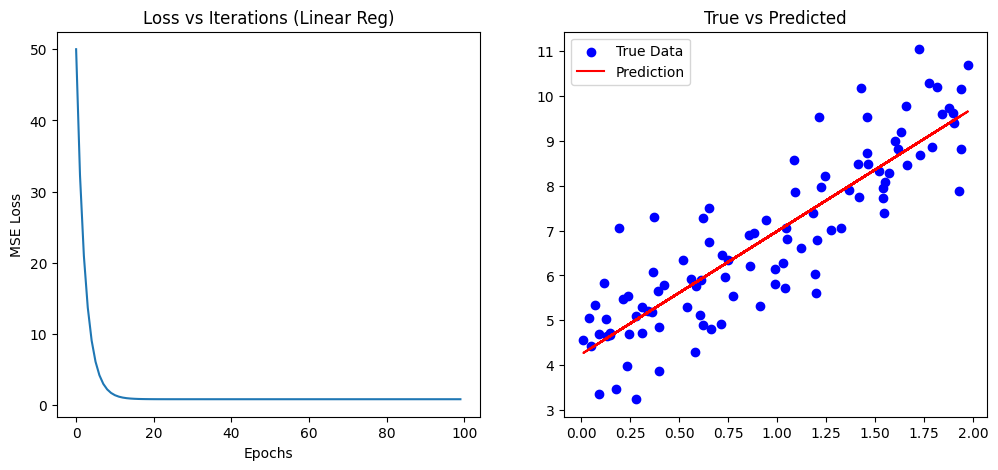

In [16]:
# 1. Generate Synthetic Data
X_gen = 2 * np.random.rand(100, 1)
y_gen = 4 + 3 * X_gen.flatten() + np.random.randn(100) # y = 4 + 3x + noise

# 2. Scale Data
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_gen)

# 3. Train Model
lr_model = LinearRegressionManual(lr=0.1, epochs=100, l2_lambda=0.01)
lr_model.fit(X_scaled, y_gen)

# 4. Predict
predictions = lr_model.predict(X_scaled)

# 5. Plot Results
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(lr_model.loss_history)
plt.title("Loss vs Iterations (Linear Reg)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")

# Plot Prediction
plt.subplot(1, 2, 2)
plt.scatter(X_gen, y_gen, color='blue', label='True Data')
plt.plot(X_gen, predictions, color='red', label='Prediction')
plt.title("True vs Predicted")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [17]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

In [18]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)
            epsilon = 1e-15 # To prevent log(0)
            y_pred_clipped = np.clip(y_predicted, epsilon, 1 - epsilon)
            bce_loss = -np.mean(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))

            l2_loss = self.l2_lambda * np.sum(self.weights ** 2)
            loss = bce_loss + l2_loss
            self.loss_history.append(loss)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + (2 * self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_pred = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_pred]


Final Accuracy: 100.00%


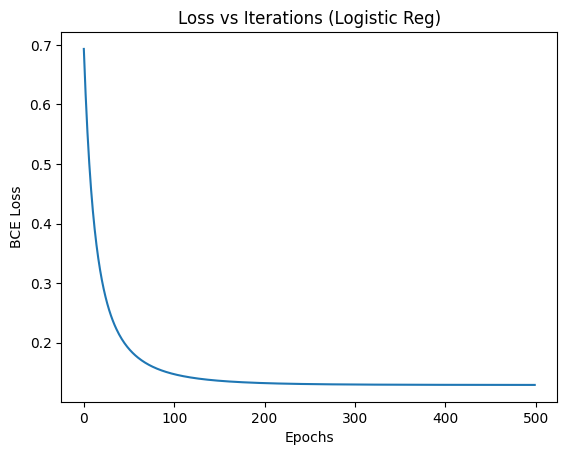

In [19]:
X_class0 = np.random.randn(50, 2) + np.array([-2, -2])
X_class1 = np.random.randn(50, 2) + np.array([2, 2])
X_log = np.vstack([X_class0, X_class1])
y_log = np.array([0]*50 + [1]*50)

scaler_log = StandardScalerManual()
X_log_scaled = scaler_log.fit_transform(X_log)

log_model = LogisticRegressionManual(lr=0.1, epochs=500, l2_lambda=0.01)
log_model.fit(X_log_scaled, y_log)

preds = log_model.predict(X_log_scaled)
accuracy = np.mean(preds == y_log)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

plt.plot(log_model.loss_history)
plt.title("Loss vs Iterations (Logistic Reg)")
plt.xlabel("Epochs")
plt.ylabel("BCE Loss")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [20]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    rows, cols = M.shape

    M_flat = M.flatten().reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, n_init=10, random_state=42)
    kmeans.fit(M_flat)

    labels_flat = kmeans.labels_
    centroids = kmeans.cluster_centers_.flatten()

    assignment_table = labels_flat.reshape(rows, cols)

    cookbook = {}
    for cluster_id in range(k):
        cookbook[cluster_id] = []

    for i in range(rows):
        for j in range(cols):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    return assignment_table, cookbook, centroids

M_test = np.random.randint(0, 100, size=(10, 10))
k_clusters = 3

table, cook, cents = kmeans_matrix(M_test, k_clusters)

print(f"Centroids: {cents}")
print(f"Example positions for Cluster 0: {cook[0][:5]} ...")
print("\nAssignment Table Snippet (Top-left 5x5):")
print(table[:5, :5])


Centroids: [54.92307692 18.         83.65714286]
Example positions for Cluster 0: [(0, 3), (1, 8), (1, 9), (2, 0), (2, 3)] ...

Assignment Table Snippet (Top-left 5x5):
[[1 1 2 0 2]
 [2 1 1 1 2]
 [0 1 2 0 2]
 [1 2 2 2 1]
 [0 0 1 0 1]]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
